In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [117]:
# Let's simulate 14 days of observations
n = 14

# Generate a time series of fake order data
# It must have a 7 day cycle
# A steadily increasing slope
# And noise. Plenty of random noise.
time_index = np.array([i for i in range(n)])
sample_data = 20/52*time_index + 20*np.sin(time_index*np.pi/3.5) + 200 + np.random.normal(loc=0, scale=5, size=n)

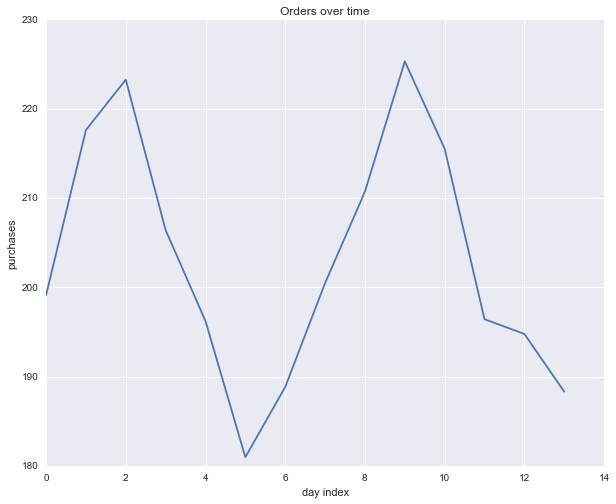

In [118]:
# Plot the data so we can see what we've got.
plt.figure(figsize=(10,8))
plt.xlabel('day index')
plt.ylabel('purchases')
plt.title('Orders over time')
plt.plot(sample_data);

In [116]:
# These are the adjustments our simulation will make
# when pretending to run control (index 0) or variant (index 1)
# 1 means the control will run at 100% of normal values
# 1.05 means the variant will run at 105% of normal values
improvement_adjustments = [1, 1.05]

In [90]:
# For n number of days we run our experiment. 
# Here we decide up front which day will show which treatment
# 0 for control and 1 for the variant
test_plan = np.random.randint(0, 2, size=n)

In [91]:
# This is the same as the test plan but we
# convert the treatment indicator into the lift
# we should see on the business when it is used.
daily_adjustments = [improvement_adjustments[v] for v in test_plan]

In [92]:
# Adjust each day of the sample data by using
# our control/variant adjustments.
test_results = sample_data * daily_adjustments

In [93]:
# Associate the treatment used with the results
# or number of orders we saw for each day.
test_plan_and_results = list(zip(test_plan, test_results))

In [94]:
# Separate control and variant data from
# each other
_, control_data = zip(*np.array(list(filter(lambda x: x[0] == 0, test_plan_and_results))))
_, variant_data = zip(*np.array(list(filter(lambda x: x[0] == 1, test_plan_and_results))))

In [95]:
# Perform a statistical analysis on the psuedo-control and variant.
# Find the probability distribution for the true mean difference
# between the control and variant.

control_means = []
variant_means = []
improvement_diffs = []

for _ in range(20000):
    # We can't assume that the control and variant have 
    # the same number of data points because we used 
    # random assignment. We must specify the number of 
    # days of data we saw for both control and variant.
    # This gives us the correct amount of uncertainty.
    control_mean = np.random.choice(control_data, size=len(control_data), replace=True).mean()
    variant_mean = np.random.choice(variant_data, size=len(variant_data), replace=True).mean()

    control_means.append(control_mean)
    variant_means.append(variant_mean)
    improvement_diffs.append(variant_mean/control_mean-1)

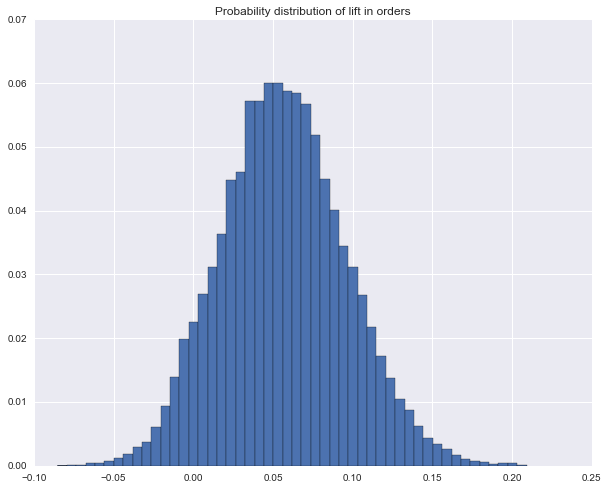

In [109]:
# Plot the results of the statistical analysis.

weights = np.ones_like(improvement_diffs)/len(improvement_diffs)
plt.figure(figsize=(10,8))
plt.title('Probability distribution of lift in orders')
plt.hist(improvement_diffs, bins=50, weights=weights);

In [115]:
# Probability of positive lift

(np.array(improvement_diffs) > 0).sum()/len(improvement_diffs)

0.92900000000000005